# `eralchemy` ERD Magic Demo

Installation of modified form of `eralchmey` that uses crows foot ERD generator and straight line edge relationships:

`pip install --upgrade --no-deps git+https://github.com/psychemedia/eralchemy.git`


IPython magic that uses whatever `eralchemy` package you have installed (I think! Only tested with package above.)

`pip install --upgrade --no-deps git+https://github.com/innovationOUtside/ipython_magic_eralchemy.git`

Demo also uses: `ipython-sql`


In [1]:
!pip3 install --upgrade --no-deps git+https://github.com/psychemedia/eralchemy.git


  Cloning https://github.com/psychemedia/eralchemy.git to /private/var/folders/ln/tnrpmq9j11v2d5hlpt3xp204fq_q2t/T/pip-mvzh17d3-build
  Found existing installation: ERAlchemy 1.1.0
    Uninstalling ERAlchemy-1.1.0:
      Successfully uninstalled ERAlchemy-1.1.0
  Running setup.py install for ERAlchemy ... done


In [3]:
%load_ext sql
%load_ext eralchemy_magic

SyntaxError: invalid syntax (eralchemy.py, line 33)

In [2]:
%%sql sqlite:///amagicdemo.db
DROP TABLE IF EXISTS "table1";
DROP TABLE IF EXISTS "table2";
DROP TABLE IF EXISTS "table3";
DROP TABLE IF EXISTS "table4";

CREATE TABLE "table1" (
  "col1" TEXT NOT NULL UNIQUE PRIMARY KEY,
  "col2" INTEGER,
  "col3" TEXT);

CREATE TABLE "table2" (
  "col1" TEXT,
  "col2" INTEGER NOT NULL UNIQUE PRIMARY KEY,
  "col3" TEXT,
  FOREIGN KEY ("col1") REFERENCES "table1" ("col1"));

CREATE TABLE "table3" (
  "col1" TEXT,
  "col2" INTEGER NOT NULL,
  "col3" TEXT NOT NULL UNIQUE PRIMARY KEY,
  FOREIGN KEY ("col2") REFERENCES "table1" ("col2"));

CREATE TABLE "table4" (
  "col1" TEXT,
  "col2" INTEGER,
  "col3" TEXT NOT NULL UNIQUE PRIMARY KEY,
  FOREIGN KEY ("col1") REFERENCES "table2" ("col1"),
  FOREIGN KEY ("col3") REFERENCES "table1" ("col3"));

Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [1]:
from eralchemy import render_er
from IPython.display import Image , SVG


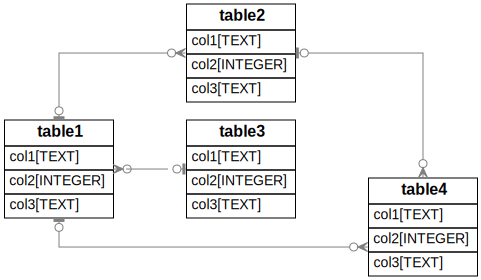

In [4]:
%erd --connection_string sqlite:///amagicdemo.db -x table

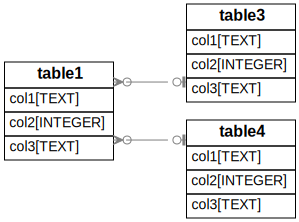

In [3]:
%erd --connection_string sqlite:///amagicdemo.db -x table2

I don't think entity relationship cardinalities are correctly mapped in `eralchemy`. The setting seems hardwired based purely on the existence of a foreign key relationship ([issue](https://github.com/Alexis-benoist/eralchemy/blob/40c9b9c8199e9740695931d48a6f90f9846fd5d8/eralchemy/sqla.py)).

One for the "to do" list...

There also look to be indesired line breaks in the rendering - not sure how to fix those?